# Regressione Logistica in Python
### Pacchetti Python di regressione logistica
Esistono diversi pacchetti necessari per la regressione logistica in Python. Sono tutti gratuiti e open source, con molte risorse disponibili. Innanzitutto avremo bisogno di NumPy , sappiamo già che è un pacchetto fondamentale per il calcolo scientifico e numerico in Python. 

L'altro pacchetto Python che utilizzeremo è scikit-learn, come già sappiamo è una delle librerie di data science e machine learning più popolari in python che possiamo utilizzare per:
- Preelaborare i dati
- Ridurre la dimensionalità dei problemi
- Convalidare i modelli
- Seleziona il modello più appropriato
- Risolvere problemi di regressione e classificazione
- Implementare l'analisi dei cluster

Infine, utilizzeremo Matplotlib per visualizzare i risultati della nostra classificazione. 

## Regressione logistica in Python con scikit-learn: Esempio 1
Il primo esempio è legato ad un problema di classificazione binaria a variabile singola. Questo è il tipo più semplice di problema di classificazione. I diversi passaggi generali da eseguire durante la preparazione dei modelli di classificazione sono:

- Importare pacchetti, funzioni e classi
- Ottienere dati con cui lavorare e, se appropriato, trasformali
- Creare un modello di classificazione e addestralo (o adattalo) ai dati esistenti
- Valutare il tuo modello per vedere se le sue prestazioni sono soddisfacenti

quindi andiamo al sodo...

### Passaggio 1: importare pacchetti, funzioni e classi
Innanzitutto, dobbiamo importare Matplotlib per la visualizzazione e NumPy per le operazioni sugli array. Avremo anche bisogno LogisticRegression di , classification_report(), e confusion_matrix() da scikit-learn:



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Ora abbiamo importato tutto il necessario per la regressione logistica in Python con scikit-learn!

### Passaggio 2: ottieniamo i dati
In pratica, di solito avremo alcuni dati con cui lavorare. Ai fini di questo esempio, creiamo semplicemente array per i valori di input (𝑥) e di output (𝑦):

In [2]:
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
X,y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

L'input e l'output dovrebbero essere array NumPy (istanze della classe numpy.ndarray) o oggetti simili. numpy.arange() come sappiamo crea una matrice di valori consecutivi equidistanti all'interno di un determinato intervallo. 

L'array X deve essere bidimensionale . Dovrebbe avere una colonna per ogni input e il numero di righe dovrebbe essere uguale al numero di osservazioni. Per renderlo bidimensionale, applichiamo come in precedenza .reshape() e -1 per ottenere tutte le righe necessarie e 1 per ottenere una colonna. 

Quindi X ha due dimensioni:

- Una colonna per un singolo input;
- Dieci righe , ciascuna corrispondente a un'osservazione.

y è unidimensionale con dieci elementi. 
Anche in questo caso ogni item corrisponde a un'osservazione. Contiene solo zeri e uno poiché si tratta di un problema di classificazione binaria.

### Passaggio 3: creiamo un modello e addestriamolo
Una volta preparati l'input e l'output, è possibile creare e definire il modello di classificazione. 
Lo rappresenteremo con un'istanza della classe LogisticRegression:

In [3]:
model = LogisticRegression(solver='liblinear', random_state=0)

L'istruzione precedente crea un'istanza LogisticRegressione associa i suoi riferimenti alla variabile model. LogisticRegression ha diversi parametri opzionali che definiscono il comportamento del modello e dell'approccio:

- penalty è una stringa ( 'l2'per impostazione predefinita) che decide se esiste la regolarizzazione e quale approccio utilizzare. Altre opzioni sono 'l1', 'elasticnet'e 'none'.

- dual è un valore booleano ( False per impostazione predefinita) che decide se utilizzare la False formulazione primale (quando) o doppia (quando True).

- tol è un numero in virgola mobile ( 0.0001 per impostazione predefinita) che definisce la tolleranza per l'interruzione della procedura.

- C è un numero a virgola mobile positivo ( 1.0 per impostazione predefinita) che definisce la forza relativa della regolarizzazione. Valori più piccoli indicano una regolarizzazione più forte.

- fit_intercept è un booleano ( True di default) che decide se calcolare l'intercetta 𝑏₀ (quando True) o considerarla uguale a zero (quando False).

- intercept_scaling è un numero in virgola mobile ( 1.0 per impostazione predefinita) che definisce il ridimensionamento dell'intercetta 𝑏₀.

- class_weight è un dizionario, 'balanced', o None (predefinito) che definisce i pesi relativi a ciascuna classe. Quando None, tutte le classi hanno lo stesso peso.

- random_state è un numero intero, un'istanza di numpy.RandomState, None (predefinito) che definisce quale generatore di numeri pseudo-casuali utilizzare.

- solver è una stringa ( 'liblinear' per impostazione predefinita) che decide quale risolutore utilizzare per adattare il modello. Altre opzioni sono 'newton-cg', 'lbfgs', 'sag'e 'saga'.

- max_iter è un numero intero ( 100 per impostazione predefinita) che definisce il numero massimo di iterazioni da parte del risolutore durante l'adattamento del modello.

- multi_class è una stringa ( 'ovr' per impostazione predefinita) che decide l'approccio da utilizzare per la gestione di più classi. Altre opzioni sono 'multinomial'e 'auto'.

- verbose è un numero intero non negativo ( 0 per impostazione predefinita) che definisce la verbosità per i solutori 'liblinear'e 'lbfgs'.

- warm_start è un booleano ( False di default) che decide se riutilizzare la soluzione ottenuta in precedenza.

- n_jobs è un numero intero o None (predefinito) che definisce il numero di processi paralleli da utilizzare. None di solito significa utilizzare un core, mentre -1 significa utilizzare tutti i core disponibili.

- l1_ratio è un numero a virgola mobile compreso tra zero e uno oppure None(impostazione predefinita). Definisce l'importanza relativa della parte L1 nella regolarizzazione della rete elastica.

È necessario abbinare attentamente il risolutore e il metodo di regolarizzazione per diversi motivi:

- 'liblinear' il risolutore non funziona senza regolarizzazione.
- 'newton-cg', 'sag', 'saga' e 'lbfgs' non supportano la regolarizzazione L1.
- 'saga' è l'unico solutore che supporta la regolarizzazione della rete elastica.

Una volta creato il modello, è necessario adattarlo (o addestrarlo). L'adattamento del modello è il processo di determinazione dei coefficienti 𝑏₀, 𝑏₁, …, 𝑏ᵣ che corrispondono al miglior valore della funzione di costo. Adatta il modello con .fit():

In [4]:
model.fit(X, y)
#o per semplicità tutto su una riga
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

A questo punto abbiamo definito il modello di classificazione.

Possiamo quindi ottenere rapidamente gli attributi del nostro modello, a esempio, l'attributo .classes_rappresenta l'array di valori distinti che y richiede, o possiamo anche ottenere il valore della pendenza 𝑏₁ e l'intercetta 𝑏₀ della funzione lineare 𝑓:

In [5]:
print(model.classes_)
print(model.intercept_)
print(model.coef_)

[0 1]
[-1.04608067]
[[0.51491375]]


Le classi come abbiamo detto sono binarie nel nostro esempio (quindi 0 o 1), altra cosa che notiamo è che 𝑏₀ è contenuto in un array unidimensionale, mentre 𝑏₁ è contenuto in un array bidimensionale. 
### Passaggio 4: valutare il modello
Una volta definito un modello, è possibile verificarne le prestazioni con .predict_proba(), che restituisce la matrice delle probabilità che l'output previsto sia uguale a zero o uno:

In [6]:
model.predict_proba(X)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

Nella matrice sopra, ogni riga corrisponde a una singola osservazione. La prima colonna è la probabilità che il risultato previsto sia zero, ovvero 1 - 𝑝(𝑥). La seconda colonna è la probabilità che l'output sia uno, o 𝑝(𝑥).

Possiamo ottenere le previsioni effettive, basate sulla matrice di probabilità e sui valori di 𝑝(𝑥), con .predict():

In [7]:
model.predict(X)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Questa funzione restituisce i valori di output previsti come matrice unidimensionale.

La figura seguente illustra i risultati di input, output e classificazione:

![grafico input regressione logistica](dati/img/log-reg-input.webp)

I cerchi verdi rappresentano le risposte effettive e le previsioni corrette. La × rossa mostra la previsione errata. La linea nera completa è la linea di regressione logistica stimata 𝑝(𝑥). I quadrati grigi sono i punti su questa linea che corrispondono a 𝑥 e ai valori nella seconda colonna della matrice di probabilità. La linea tratteggiata nera è il logit 𝑓(𝑥).

Il valore di X leggermente superiore a 2 corrisponde alla soglia 𝑝(𝑥)=0,5, che è 𝑓(𝑥)=0. Questo valore di 𝑥 è il confine tra i punti classificati come zero e quelli previsti come uno.

Ad esempio, il primo punto ha input 𝑥=0, output effettivo 𝑦=0, probabilità 𝑝=0,26 e un valore previsto di 0. Il secondo punto ha 𝑥=1, 𝑦=0, 𝑝=0,37 e una previsione di 0. Solo il quarto punto ha l'output effettivo 𝑦=0 e la probabilità superiore a 0,5 (a 𝑝=0,62), quindi è erroneamente classificato come 1. Tutti gli altri valori sono previsti correttamente.

Quando nove osservazioni su dieci sono classificate correttamente, la precisione del nostro modello è pari a 9/10=0,9, che possiamo ottenere con .score():

In [8]:
model.score(X, y)

0.9

.score() accetta l'input e l'output come argomenti e restituisce il rapporto tra il numero di previsioni corrette e il numero di osservazioni.

Possiamo ottenere maggiori informazioni sull'accuratezza del modello con una matrice di confusione . Nel caso della classificazione binaria, la matrice di confusione mostra i numeri seguenti:

- Veri negativi nella posizione in alto a sinistra
- Falsi negativi nella posizione in basso a sinistra
- Falsi positivi nella posizione in alto a destra
- Veri positivi nella posizione in basso a destra
Per creare la matrice di confusione, è possibile utilizzare confusion_matrix() e fornire gli output effettivi e previsti come argomenti:

In [9]:
confusion_matrix(y, model.predict(X))

array([[3, 1],
       [0, 6]])

La matrice ottenuta mostra quanto segue:

- Tre previsioni vere negative: le prime tre osservazioni sono zeri predetti correttamente.
- Nessuna previsione falsa negativa: queste sono quelle erroneamente previste come zero.
- Una previsione falsa positiva: la quarta osservazione è uno zero che è stato erroneamente previsto come uno.
- Sei previsioni vere positive: le ultime sei osservazioni sono quelle previste correttamente.
Spesso è utile visualizzare la matrice di confusione. Possiamo farlo con .imshow() Matplotlib, che accetta la matrice di confusione come argomento:

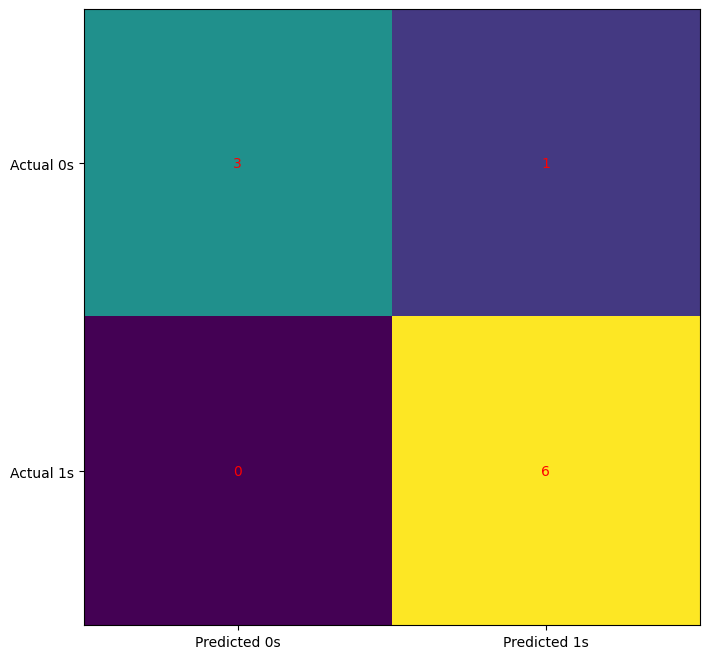

In [10]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Il codice sopra crea una mappa termica che rappresenta la matrice di confusione

In questa figura, colori diversi rappresentano numeri diversi e colori simili rappresentano numeri simili. Le mappe di calore sono un modo carino e conveniente per rappresentare una matrice.

È possibile ottenere un rapporto più completo sulla classificazione con classification_report():



In [11]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Questa funzione accetta anche gli output effettivi e previsti come argomenti. Restituisce un report sulla classificazione come dizionario se fornito output_dict=True o una stringa altrimenti.

Nota: in genere è meglio valutare il modello con i dati non utilizzati per l'addestramento. In questo modo si evitano i bias e si rileva l'overfitting. 


### Migliorariamo il modello
Possiamo migliorare il nostro modello impostando parametri diversi, a esempio lavoriamo con la forza di regolarizzazione C pari a 10.0, invece del valore predefinito di 1.0, così da avere un altro modello con parametri diversi. Naturalmente avrà anche una diversa matrice di probabilità e un diverso insieme di coefficienti e previsioni:

In [12]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)
print(model.intercept_)
print(model.coef_)
print(model.predict_proba(X))
print(model.predict(X))


[-3.51335372]
[[1.12066084]]
[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
[0 0 0 0 1 1 1 1 1 1]


Come possiamo vedere, i valori assoluti dell'intercetta 𝑏₀ e del coefficiente 𝑏₁ sono maggiori. Questo perché il valore maggiore di C significa una regolarizzazione più debole o una penalizzazione più debole correlata a valori elevati di 𝑏₀ e 𝑏₁.

Valori diversi di 𝑏₀ e 𝑏₁ implicano un cambiamento del logit 𝑓(𝑥), diversi valori delle probabilità 𝑝(𝑥), una forma diversa della linea di regressione e possibilmente cambiamenti in altri risultati previsti e prestazioni di classificazione. Il valore limite di 𝑥 per il quale 𝑝(𝑥)=0,5 e 𝑓(𝑥)=0 è ora più alto, è superiore a 3. In questo caso, ottieniamo tutte le previsioni vere, come vedremo dall'accuratezza, dalla matrice di confusione e dal rapporto di classificazione:

In [14]:
print(model.score(X, y))
print(confusion_matrix(y, model.predict(X)))
print(classification_report(y, model.predict(X)))

1.0
[[4 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Il punteggio (o la precisione) di 1 e gli zeri nei campi in basso a sinistra e in alto a destra della matrice di confusione indicano che i risultati effettivi e quelli previsti sono gli stessi. Ciò è mostrato anche nella figura seguente:

![grafico input regressione logistica](dati/img/log-reg-input2.webp)

Questa figura illustra che la linea di regressione stimata ora ha una forma diversa e che il quarto punto è classificato correttamente come 0. Non c'è una x rossa, quindi non c'è una previsione sbagliata.

## Altro problema di classificazione
Risolviamo un altro problema di classificazione, simile al precedente, tranne per il fatto che l'output differisce nel secondo valore. 
Il codice è quindi simile al caso precedente:

In [15]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(X)
y_pred = model.predict(X)
score_ = model.score(X, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

Questo esempio di codice di classificazione genera i seguenti risultati:

In [16]:
print('X:', X, sep='\n')

print('y:', y, sep='\n', end='\n\n')

print('intercept:', model.intercept_)

print('coef:', model.coef_, end='\n\n')

print('p_pred:', p_pred, sep='\n', end='\n\n')

X:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y:
[0 1 0 0 1 1 1 1 1 1]

intercept: [-1.51632619]
coef: [[0.703457]]

p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]



In [17]:
print('y_pred:', y_pred, end='\n\n')

print('score_:', score_, end='\n\n')

print('conf_m:', conf_m, sep='\n', end='\n\n')

print('report:', report, sep='\n')

y_pred: [0 0 0 1 1 1 1 1 1 1]

score_: 0.8

conf_m:
[[2 1]
 [1 6]]

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



In questo caso, il punteggio (o la precisione) è 0,8. Ci sono due osservazioni classificate in modo errato. Una di queste è un falso negativo, mentre l'altra è un falso positivo.

La figura seguente illustra questo esempio con otto previsioni corrette e due errate:

![grafico input regressione logistica](dati/img/log-reg-input3.webp)

Questa figura rivela una caratteristica importante di questo esempio, a differenza del precedente questo problema non è linearmente separabile . 
Ciò significa che non possiamo trovare un valore di 𝑥 e tracciare una linea retta per separare le osservazioni con 𝑦=0 e quelle con 𝑦=1. Non esiste una linea del genere.  
La regressione logistica è infatti essenzialmente un classificatore lineare, quindi teoricamente non possiamo creare un modello di regressione logistica con una precisione pari a 1 in questo caso.

## Regressione logistica in Python con scikit-learn: Esempio 2
Partiamo nell'importare le librerie e creare i due set d'esempio, X che reppresenta la grandezza di un tumore in cm, y se il tumore è maligno (0 per "No", 1 per "Si").

In [18]:
import numpy
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Dal modulo sklearn utilizzeremo il metodo LogisticRegression() per creare un oggetto di regressione logistica e il suo metodo fit() che prende i valori indipendenti e dipendenti come parametri e riempie l'oggetto di regressione con i dati che descrivono la relazione:

In [19]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

A questo punto usiamo l'oggetto di regressione logistica per stabilire se un tumore è canceroso in base alle dimensioni del tumore:

In [20]:
#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


Andiamo a vedere il coefficiente è la variazione attesa nelle probabilità logaritmiche di ottenere una variazione unitaria del risultato in X.

In [21]:
log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds)

[[4.03541657]]


Questo ci dice che quando la dimensione di un tumore aumenta di 1 mm, le probabilità che si tratti di un tumore canceroso aumentano di 4 volte.

Possiamo quindi usare il coefficiente e i valori dell'intercetta per trovare la probabilità che ciascun tumore sia canceroso.

In [22]:
def logit2prob(logr,x):
  
  #Per trovare le probabilità logaritmiche per ciascuna osservazione, 
  #dobbiamo prima creare una formula simile a quella della regressione lineare, estraendo il coefficiente e l'intercetta.  
  log_odds = logr.coef_ * x + logr.intercept_
  
  #Per poi convertire le probabilità logaritmiche in quote dobbiamo renderle esponenziali.
  odds = numpy.exp(log_odds)

  #Ora che abbiamo le quote, possiamo convertirle in probabilità dividendole per 1 più le quote.
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X))

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


Quindi:

- per X = 3,78, La probabilità che un tumore delle dimensioni di 3,78 cm sia canceroso è del 61%.

- per X = 2,44, La probabilità che un tumore delle dimensioni di 2,44 cm sia canceroso è del 19%.

- per X =2,09, La probabilità che un tumore delle dimensioni di 2,09 cm sia canceroso è del 13%.

## Regressione logistica in Python con scikit-learn: Esempio 3 Fiori Iris
In questo esempio partiamo dal dataset di scikit-learn sui fiori iris, il set di dati classifica 3 diversi tipi di fiori (Setosa, Versicolor e Virginica) in base a lunghezza dei petali e dei sepali dell'iride.
Le righe rappresentano i campioni e le colonne sono: Lunghezza sepalo, Larghezza sepalo, Lunghezza petalo e Larghezza petalo.

Utilizziamo quindi i dati di larghezza e lunghezza dei sepali (il botanica il termine "sepali" indica quegli elementi di derivazione fogliare che formano il calice del fiore.) per capire di quale dei tre tipi di fiori iris fanno parte e poi visualizziamo un grafico che ne mostra le differenze.

![sepali](dati/img/sepali.png)


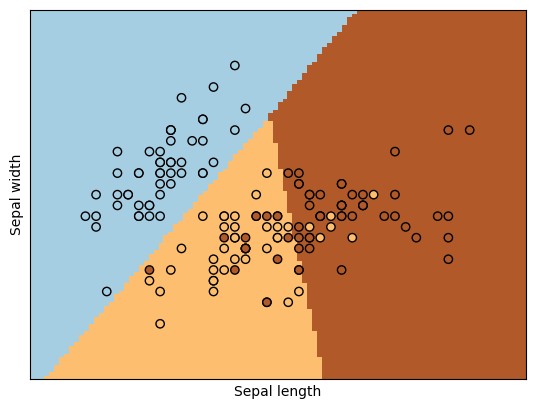

In [23]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

In [25]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Esercizio 1
Partendo dal dataset al seguente link https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv relativo a campagne di marketing diretto (telefonate) di un istituto bancario portoghese, create il modello più preciso possibile per prevedere se il cliente sottoscriverà (1/0) un deposito a termine(variabile y).

Nel dataset abbiamo le seguenti colonne:

#### Variabili di input

- età (numerico)
- lavoro: tipologia di lavoro (categoriale: “amministratore”, “operaio”, “imprenditore”, “cameriera”, “dirigente”, “pensionato”, “lavoratore autonomo”, “servizi”, “studente”, “tecnico” ”, “disoccupato”, “sconosciuto”)
- coniugale: stato civile (categorico: “divorziato”, “sposato”, “celibe”, “sconosciuto”)
- istruzione (categoriale: “basic.4a”, “basic.6a”, “basic.9a”, “scuola superiore”, “analfabeta”, “corso.professionale”, “laurea.universitaria”, “sconosciuto”)
- default: ha credito in default? (categorico: “no”, “sì”, “sconosciuto”)
- alloggio: ha mutuo per la casa? (categorico: “no”, “sì”, “sconosciuto”)
- prestito: ha prestito personale? (categorico: “no”, “sì”, “sconosciuto”)
- contatto: tipo di comunicazione del contatto (categoriale: “cellulare”, “telefonico”)
- mese: mese dell'anno dell'ultimo contatto (categoriale: “gen”, “feb”, “mar”, …, “nov”, “dic”)
- day_of_week: ultimo giorno di contatto della settimana (categorico: “mon”, “mar”, “mer”, “gio”, “ven”)
- durata: durata dell'ultimo contatto, in secondi (numerico). Nota importante: questo attributo influisce notevolmente sulla destinazione dell'output (ad esempio, se durata=0 allora y='no'). La durata non è nota prima che venga effettuata una chiamata, inoltre, dopo la fine della chiamata, è ovviamente nota y. Pertanto, questo input dovrebbe essere incluso solo a fini di benchmark e dovrebbe essere scartato se l’intenzione è quella di avere un modello predittivo realistico
- campagna: numero di contatti eseguiti durante questa campagna e per questo cliente (numerico, include l'ultimo contatto)
- pdays: numero di giorni trascorsi dall'ultimo contatto del cliente da una campagna precedente (numerico; 999 significa che il cliente non è stato contattato in precedenza)
- precedente: numero di contatti effettuati prima di questa campagna e per questo cliente (numerico)
- poutcome: esito della precedente campagna di marketing (categoriale: “fallimento”, “inesistente”, “successo”)
- emp.var.rate: tasso di variazione dell'occupazione — (numerico)
- cons.price.idx: indice dei prezzi al consumo — (numerico)
- cons.conf.idx: indice di fiducia dei consumatori — (numerico)
- euribor3m: tasso euribor a 3 mesi — (numerico)
- nr.occupati: numero di dipendenti — (numerico)

### Variabile output (obiettivo desiderato):

- y — il cliente ha sottoscritto un deposito a termine? (binario: “1”, significa “Sì”, “0” significa “No”)


## Valutate se utilizzare tutti i paramentri o solo alcuni di essi:

## - Create il modello e addestratelo;
## - Valutate il modello;
## - Create la matrice di confusione;
## - Create un report di classificazione
## - Create i grafici




- 

## Esercizio 2
Partendo dal dataset al seguente link https://www.kaggle.com/datasets/dragonheir/logistic-regression/data create il modello più preciso possibile per prevedere gli acquisti in base alla caratteristica del cliente.

## Regressione logistica in Python con scikit-learn: Esempio 4 riconoscimento della scrittura
Questo esempio riguarda il riconoscimento delle immagini, per essere più precisi, lavoreremo sul riconoscimento delle cifre scritte a mano. Utilizzeremo un set di dati con 1797 osservazioni, ognuna delle quali è un'immagine di una cifra scritta a mano, ogni immagine ha 64 px, con una larghezza di 8 px e un'altezza di 8 px.
Gli input (𝐱) sono vettori con 64 dimensioni o valori, ciascun vettore di input descrive un'immagine, ciascuno dei 64 valori rappresenta un pixel dell'immagine. 
- I valori di input sono numeri interi compresi tra 0 e 16, a seconda della tonalità di grigio del pixel corrispondente. 
- L'output (𝑦) per ciascuna osservazione è un numero intero compreso tra 0 e 9, coerente con la cifra sull'immagine. 
Ci sono dieci classi in totale, ciascuna corrispondente a un'immagine.

### Passaggio 1: importiamo i pacchetti
Dovremo importare Matplotlib, NumPy e diverse funzioni e classi da scikit-learn:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Passaggio 2 a: ottieniamo i dati
Possiamo prendere il set di dati direttamente da scikit-learn con load_digits(). Restituisce una tupla di input e output:

In [ ]:
X, y = load_digits(return_X_y=True)
print(X)
print(y)

Questi sono i dati con cui lavorare, X è un array multidimensionale con 1797 righe e 64 colonne che contiene numeri interi da 0 a 16. 
y è un array unidimensionale con 1797 numeri interi compresi tra 0 e 9.

Proviamo a visualizzare qualche cifra:

In [ ]:
digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(30, 30))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

### Passaggio 2 b: suddivisione dei dati
Come abbiamo visto, è una pratica buona e ampiamente adottata dividere il set di dati con cui stiamo lavorando in due sottoinsiemi:
- set di addestramento 
- set di test. 
Utilizzeremo quindi il set di training per allenare il nostro modello e valuteremo le prestazioni con il set di prova. Come sappiamo questo approccio consente una valutazione imparziale del modello.

Un modo per suddividere il set di dati in set di training e test è applicare train_test_split() :

In [ ]:
x_train, x_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=0)

train_test_split() richiede opzionalmente test_size, con che determina la dimensione del set di test e random_state che definisce lo stato del generatore di numeri pseudo-casuali, oltre ad altri argomenti opzionali. 

Una volta suddivisi i dati, possiamo dimenticarci momentaneamente di x_test e y_test finché non completiamo il modello.

### Passaggio 2 c: ridimensionare i dati
Come già visto, la standardizzazione è il processo di trasformazione dei dati in modo tale che la media di ciascuna colonna diventi uguale a zero e la deviazione standard di ciascuna colonna sia pari a uno. In questo modo si ottiene la stessa scala per tutte le colonne. Procediamo nel seguente modo per standardizzare i dati:

- Calcoliamo la media e la deviazione standard per ciascuna colonna.
- Sottraiamo la media corrispondente da ciascun elemento.
- Dividiamo la differenza ottenuta per la deviazione standard corrispondente.

Sebbene, come abbiamo visto in precedenza, in molti casi non sia necessario standardizzare i dati di input in questo caso è consigliabile per utilizzarli per la regressione logistica, infatti la standardizzazione potrebbe migliorare le prestazioni del algoritmo.

Possiamo standardizzare i nostri input creando un'istanza di StandardScaler e chiamando .fit_transform():

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

.fit_transform() come sappiamo adatta l'istanza di StandardScaler all'array passato come argomento, trasformando questo array restituisce il nuovo array standardizzato. Ora, x_train è un array di input standardizzato.

### Passaggio 3: creiamo un modello e addestriamolo
Ancora una volta, creiamo un'istanza di LogisticRegression e richiamiamo .fit():

In [ ]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

Quando lavoriamo con problemi con più di due classi, è possibile specificare il multi_class parametro di LogisticRegression, esso determina come risolvere il problema:

- 'ovr' dice di adattare il binario a ogni classe.
- 'multinomial' dice di applicare l'adattamento multinomiale delle perdite.

### Passaggio 4: valutare il modello
Dovremo valutare il modello in modo simile a quello che abbiamo già fatto negli esempi precedenti, con la differenza che utilizzeremo principalmente x_test e y_test, che sono i sottoinsiemi non applicati per l'addestramento. Se abbiamo deciso di standardizzare x_train, il modello ottenuto si basa sui dati ridimensionati, quindi x_test dovrebbe essere ridimensionato anche con la stessa istanza di StandardScaler:

In [ ]:
x_test = scaler.transform(x_test)

È così che ottieniamo un nuovo file x_test, in questo caso usiamo .transform() che trasforma solo l'argomento senza adattare lo scaler.

A questo punto è possibile ottenere le previsioni con .predict():



In [ ]:
y_pred = model.predict(x_test)

La variabile y_pred è ora associata a una matrice degli output previsti, ora otteniamo la precisione con .score() con i dati di training e quelli di test:



In [ ]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

A questo punto possiamo ottenere la matrice di confusione e vederla graficamente considerando che conterrà 100 numeri:

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=15, color='black')
ax.set_ylabel('Actual outputs', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

Questa è la mappa termica che illustra la matrice di confusione con numeri e colori. Possiamo vedere che le sfumature del viola rappresentano numeri piccoli (come 0, 1 o 2), mentre il verde e il giallo mostrano numeri molto più grandi (27 e oltre).

I numeri sulla diagonale principale (27, 32, …, 36) mostrano il numero di previsioni corrette dal set di test. Ad esempio, ci sono 27 immagini con zero, 32 immagini con uno e così via che sono classificate correttamente. Altri numeri corrispondono a previsioni errate. A esempio, il numero 1 nella terza riga e nella prima colonna mostra che esiste un'immagine con il numero 2 classificato erroneamente come 0.

Infine, possiamo ottenere il report sulla classificazione come stringa o dizionario con classification_report():

In [ ]:
print(classification_report(y_test, y_pred))